In [1]:
"""
Name: analysis.ipynb
Authors: Stephan Meighen-Berger
Example analysis
"""

'\nName: analysis.ipynb\nAuthors: Stephan Meighen-Berger\nExample analysis\n'

In [2]:
# General imports
import numpy as np
import matplotlib.pyplot as plt
import sys
import pickle
import pandas as pd

In [3]:
# picture path
PICS = '../pics/'

In [4]:
# Time_cut
t_cut = 20
data_count = 300
photon_count = 1e0

In [5]:
# The realistic simulation
binned_data = []
times = []
frequencies = []
# fft_trafo = []
for i in range(data_count):
    # Loading data
    data = np.load('../data/storage/benchmark_v2_%s.npy' % str(i))
    org_times = np.load('../data/storage/benchmark_v2_time_%s.npy' % str(i))
    # Processing
    # Adding 0 at the beginning and end
    if len(data) <= t_cut:
        continue
    tmp_data = np.insert(data[t_cut:], [0, -1], [0., 0.])
    step = np.diff(org_times)[0]
    tmp_times = np.insert(org_times[t_cut:], [-2, -1], [org_times[-1] + step, org_times[-1] + 2 * step])
    # Processed
    binned_data.append(tmp_data * photon_count)
    times.append(tmp_times)

In [6]:
data_count = len(binned_data)

In [7]:
# Average
average = np.nan_to_num(np.average(binned_data, axis=0))
average = average - np.mean(average)
average_fft = np.abs(np.fft.fft(average))
frequencies_average = np.fft.fftfreq(average.size, d=np.diff(times[-1])[0])

In [8]:
# Sum
summing = np.nan_to_num(np.sum(binned_data, axis=0))
summing = summing - np.mean(summing)
summing_fft = np.abs(np.fft.fft(summing))
frequencies_summing = np.fft.fftfreq(summing.size, d=np.diff(times[-1])[0])

In [9]:
# Smoothing
# smoothing_window = 3
# data_smoothed = np.array([
#     pd.Series(binned_data[i]).rolling(window=smoothing_window, center=True, min_periods=1).mean()
#     for i in range(data_count)
# ])
# data_smoothed = np.array([(data_smoothed[i] - np.mean(data_smoothed[i])).flatten() for i in range(data_count)])
# average_smoothed = np.average(data_smoothed, axis=0)
# average_smoothed_fft = np.abs(np.fft.fft(np.sqrt(average_smoothed))**2.)
# frequencies_smoothed = np.fft.fftfreq(average_smoothed.size, d=np.diff(times[-1])[0])

In [10]:
# Plotting standards
std_size = 20.
fontsize = 30.
lw=3.
h_length=1.5

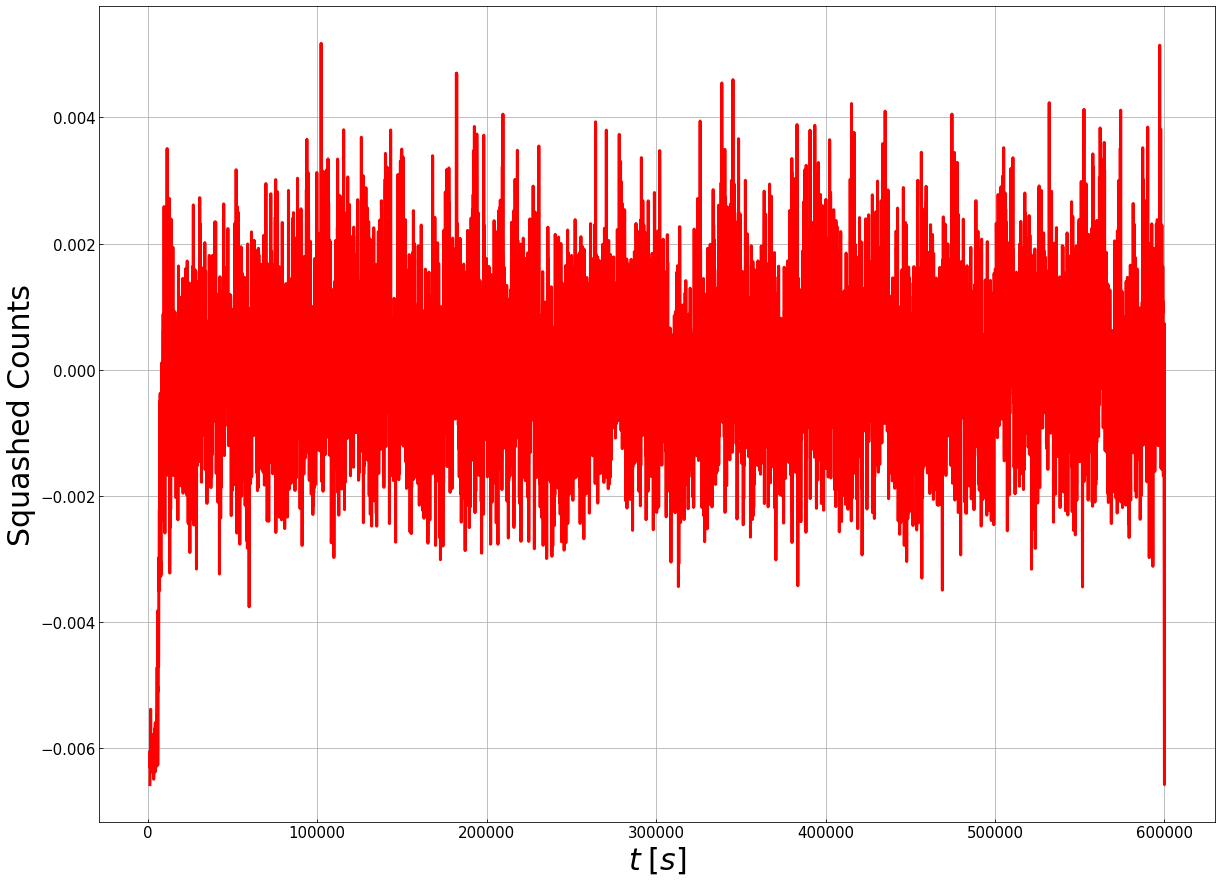

In [11]:
# Time distributions
figure, (ax1) = plt.subplots(1, 1, figsize=(std_size, std_size * 6. / 8.), sharex=True)
# Realistic
ax1.plot(
    times[0],
    average,
    lw=lw, color='r', ls='-'
)
# ax1.set_xlim(0, 720 * 60 * 4)
# ax1.set_ylim(1e9, 1e11)
ax1.set_xscale('linear')
ax1.set_yscale('linear')
ax1.set_xlabel(r'$t\;[s]$', fontsize=fontsize)
ax1.set_ylabel(r'Squashed Counts', fontsize=fontsize)
ax1.tick_params(axis = 'both', which = 'major', labelsize=fontsize/2, direction='in')
ax1.tick_params(axis = 'both', which = 'minor', labelsize=fontsize/2, direction='in')
ax1.grid(True)
plt.show()

In [12]:
def annot_max(x,y, ax=None, loc=[0.94,0.96]):
    xmax = x[np.argmax(y)]
    ymax = y.max()
    text= r"$\nu$={:.3f}, I={:.3f}".format(xmax, ymax)
    if not ax:
        ax=plt.gca()
    bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=lw)
    arrowprops=dict(arrowstyle="->",connectionstyle="angle,angleA=0,angleB=60", lw=lw)
    kw = dict(xycoords='data',textcoords="axes fraction",
              arrowprops=arrowprops, bbox=bbox_props, ha="right", va="top", fontsize=fontsize)
    ax.annotate(text, xy=(xmax, ymax), xytext=(loc[0],loc[1]), **kw)

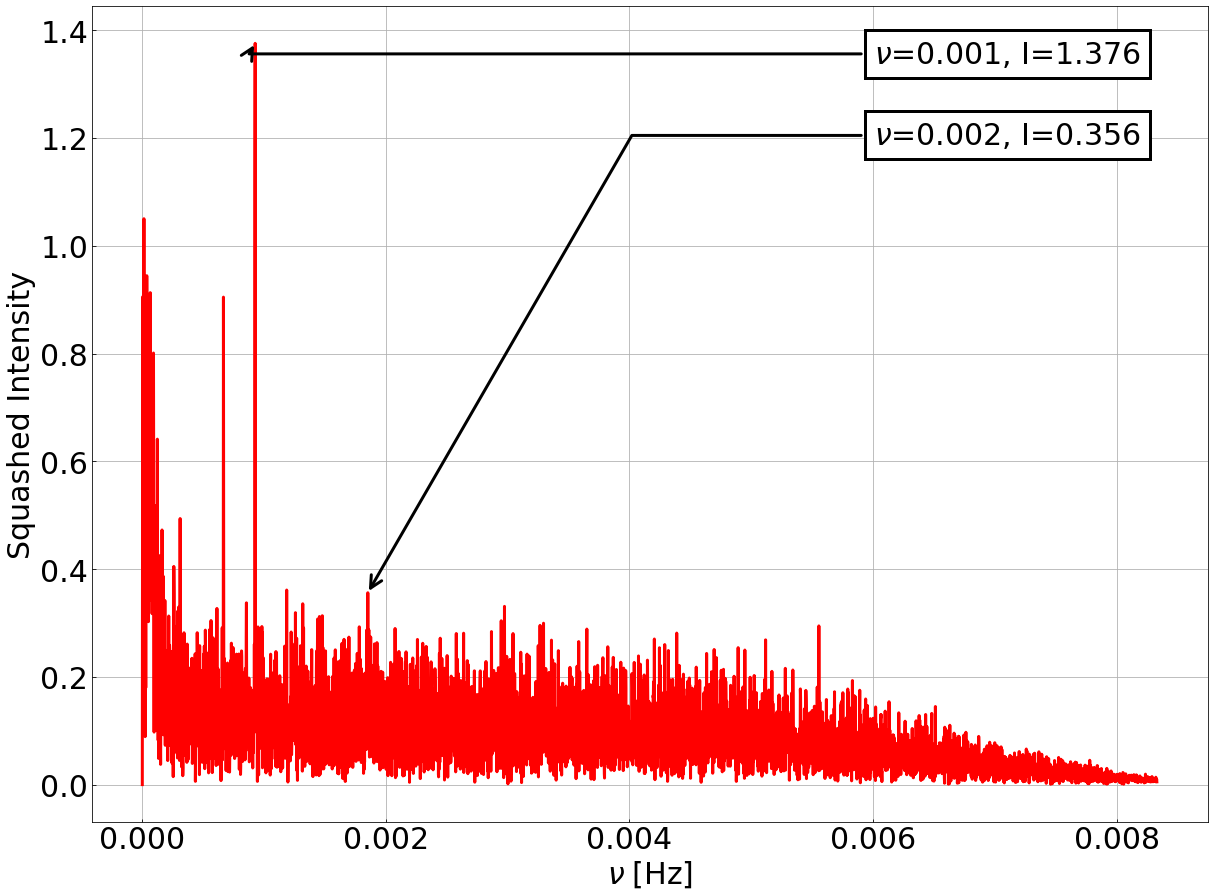

In [13]:
figure, (ax1) = plt.subplots(1, 1, figsize=(std_size, std_size * 6. / 8.), sharex=True)
cut_off = np.argmax(frequencies_average)
ax1.plot(frequencies_average[:cut_off],
         average_fft[:cut_off],
         ls='-',
         color='r',
         lw=lw)
annot_max(frequencies_average[:cut_off][100:],
         average_fft[:cut_off][100:], loc=[0.94, 0.96])
annot_max(frequencies_average[:cut_off][1000:],
         average_fft[:cut_off][1000:], loc=[0.94, 0.86])
# ax1.set_xlim(0., 1e-2)
# ax1.set_ylim(0, 1e1)
ax1.set_xscale('linear')
ax1.set_yscale('linear')
ax1.set_xlabel(r'$\nu\;[$Hz$]$', fontsize=fontsize)
ax1.set_ylabel(r'Squashed Intensity', fontsize=fontsize)
ax1.tick_params(axis = 'both', which = 'major', labelsize=fontsize, direction='in')
ax1.tick_params(axis = 'both', which = 'minor', labelsize=fontsize, direction='in')
ax1.grid(True)
plt.show()

In [14]:
figure.savefig(PICS + "FFT_v3.png",
               bbox_inches='tight')